# **Artificial Neural Networks (ANN)**
---
we will cover:
- What a neuron is
- How ANN works mathematically
- Activation functions
- ANN forward pass from scratch
- ANN using Keras (first real model)



# **1. Introduction to Artificial Neural Networks (ANN)**


Artificial Neural Networks are **brain-inspired** machine learning models.

### ANN Components:
- **Inputs** → Data (height, weight…)
- **Weights** → Importance
- **Bias** → Adjustment term
- **Activation function** → Decision maker
- **Layers** → Input → Hidden → Output

###  Real-World Applications
- Face Recognition
- Stock Market Prediction
- Medical Diagnosis
- Chatbots
- Recommendation Systems


##  ANN Basic Structure
```
Input Layer  →  Hidden Layer  → Output Layer
```
Each layer contains **neurons** that perform calculations.

---
#  **2. Building Your First Neuron**


A neuron takes inputs, multiplies them with weights, adds a bias, and outputs a value.

### Neuron Formula
```
Output = (Input1 × Weight1) + (Input2 × Weight2) + Bias
```

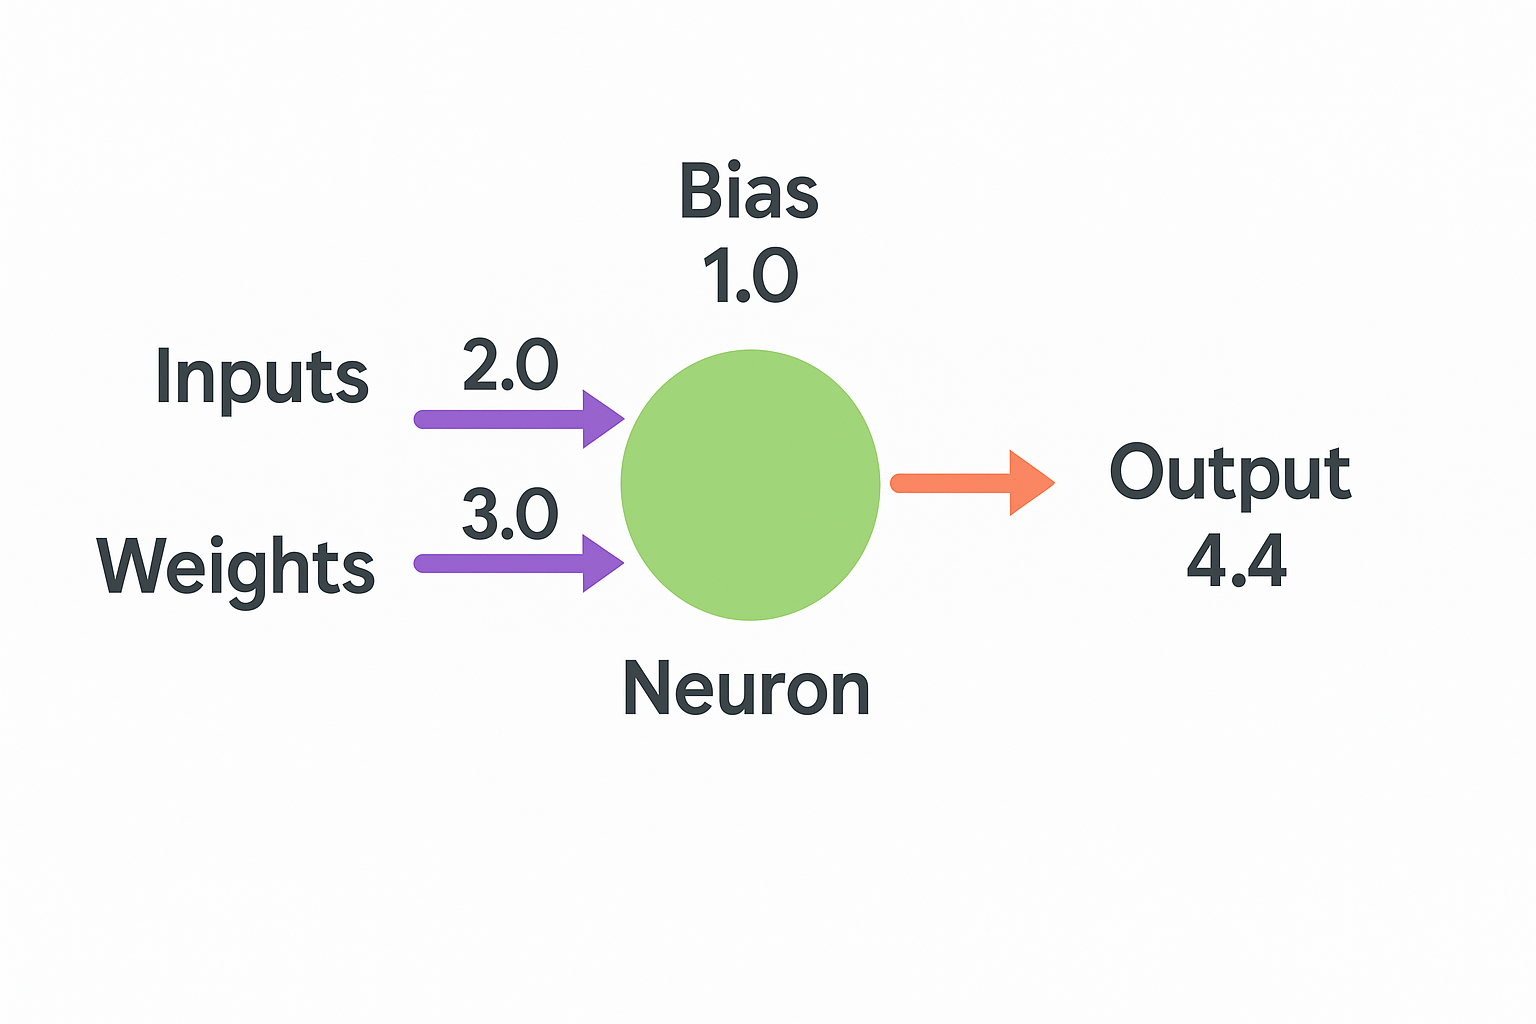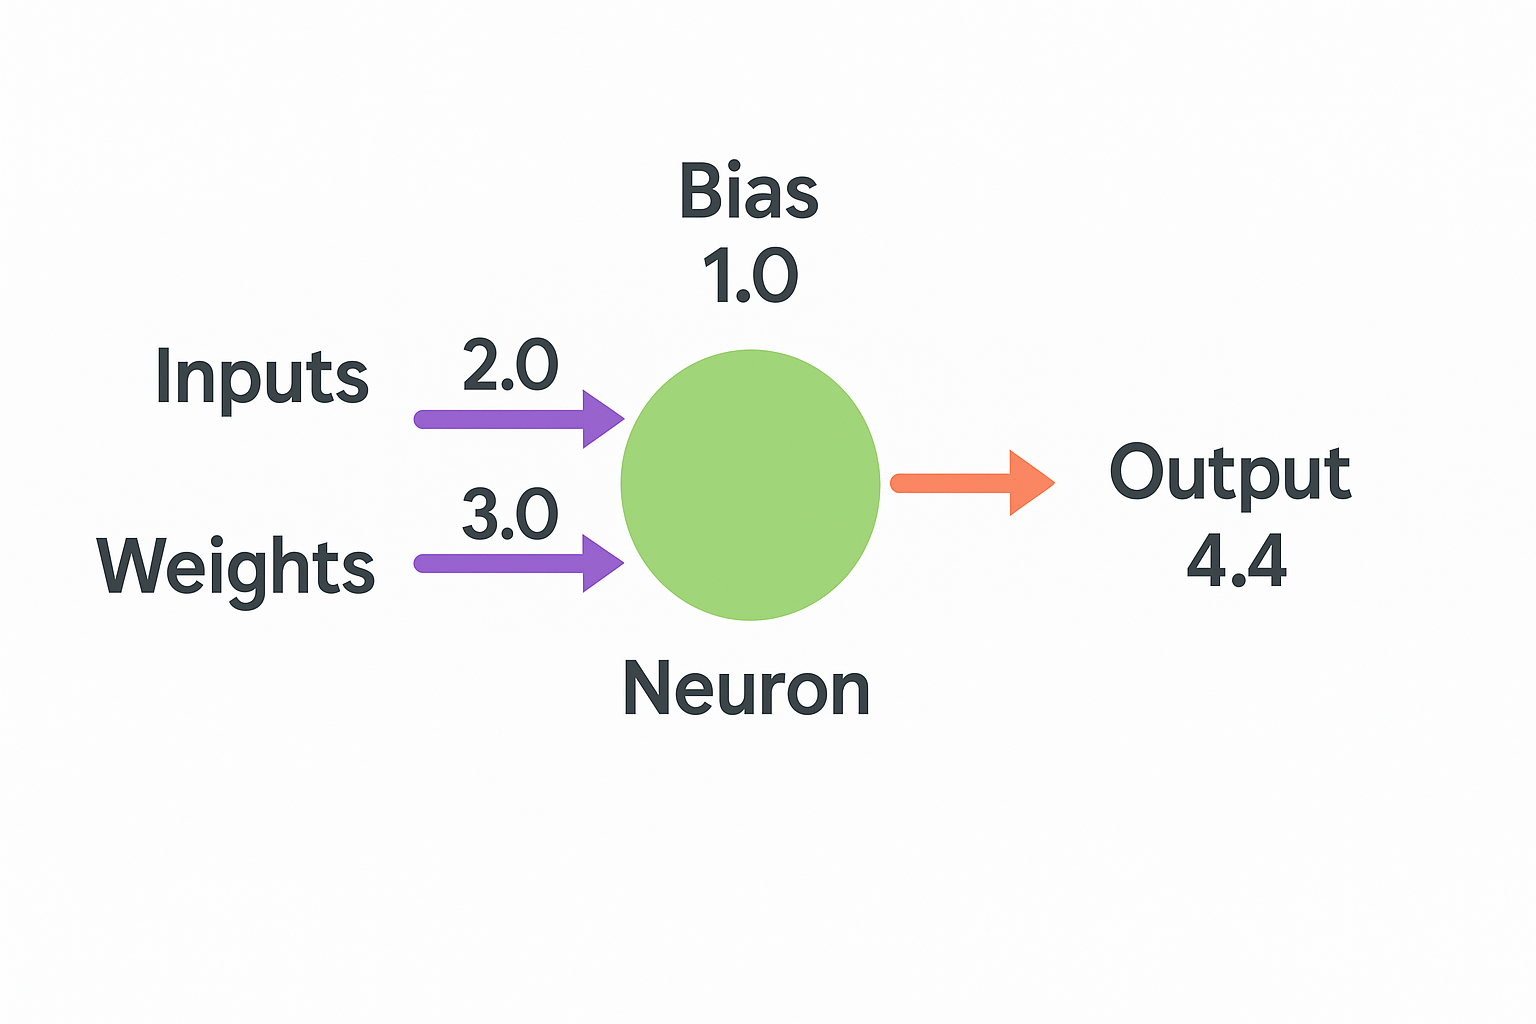

In [2]:
import numpy as np

# Inputs
inputs = np.array([2.0, 3.0])

# Weights   #2*0.5 + 3*0.8 +1  --> 1+ 2.4 +1 => 4.4
weights = np.array([0.5, 0.8])

# Bias
bias = 1.0

# Neuron output
output = np.dot(inputs, weights) + bias
output

np.float64(4.4)

# **Explanation**


- `np.dot(inputs, weights)` multiplies and adds values
- `bias` shifts the output
- Result = neuron's output
## Understanding the Neuron Code

In this code, we are creating a single artificial neuron. A neuron takes inputs, multiplies them by weights, adds a bias, and produces an output.

### 1. Inputs
These are the values sent into the neuron:
inputs = [2.0, 3.0]

### 2. Weights
Weights decide how important each input is:
weights = [0.5, 0.8]
Higher weight = more influence on the output.

### 3. Bias
Bias is a constant added to shift the output:
bias = 1.0

### 4. Neuron Output Calculation
The line:
output = np.dot(inputs, weights) + bias
means:

Step 1 — Multiply each input with its weight:
2.0 × 0.5 = 1.0
3.0 × 0.8 = 2.4

Step 2 — Add these results:
1.0 + 2.4 = 3.4

Step 3 — Add the bias:
3.4 + 1.0 = 4.4

### Final Output
4.4

### Summary
A neuron uses the formula:
Output = (Input1 × Weight1) + (Input2 × Weight2) + Bias

This is exactly how real neural networks calculate values inside each neuron.


# **3. Activation Functions**


Activation functions help networks learn **complex patterns**.

### Common Activations:
- **ReLU** → Most popular for hidden layers
- **Sigmoid** → Good for binary outputs

In [5]:
import numpy as np

# ReLU
def relu(x):
    return np.maximum(0, x)

# Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.array([-5, -1, 0, 2, 5])
relu(x), sigmoid(x)

(array([0, 0, 0, 2, 5]),
 array([0.00669285, 0.26894142, 0.5       , 0.88079708, 0.99330715]))

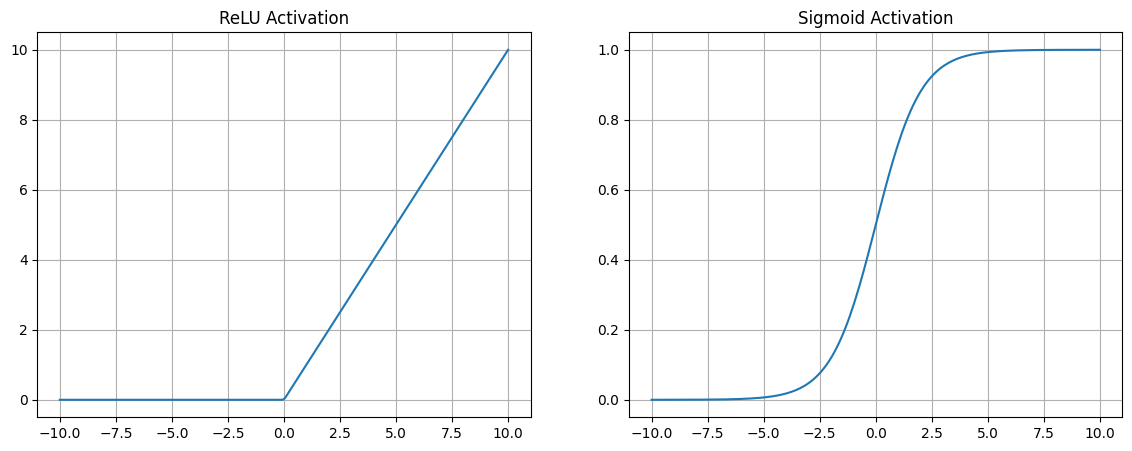

In [6]:
import matplotlib.pyplot as plt
x = np.linspace(-10, 10, 200)

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(x, relu(x))
plt.title('ReLU Activation')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(x, sigmoid(x))
plt.title('Sigmoid Activation')
plt.grid(True)

plt.show()

# **4. ANN Forward Pass (Manual Implementation)**


Let's build a **2-layer network**:
- Input: 2 values
- Hidden: 3 neurons (ReLU)
- Output: 1 neuron (Sigmoid)


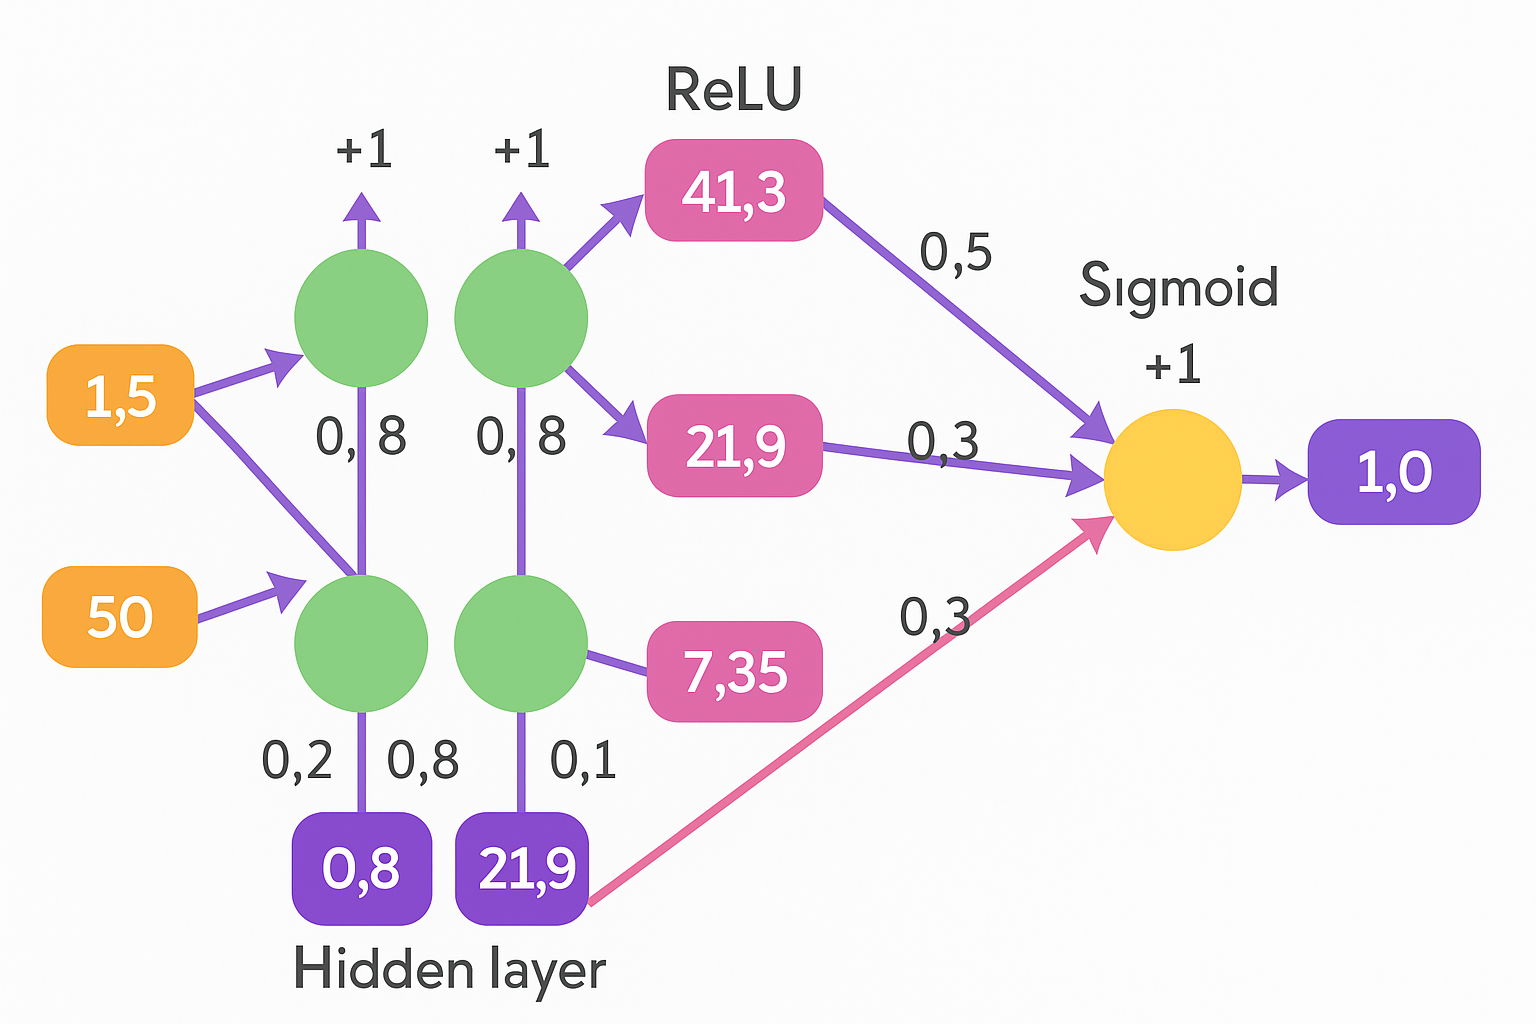

In [8]:
import numpy as np

X = np.array([1.5, 50])  #Input

# Hidden layer (3 neurons)
weights_hidden = np.array([
    [0.2, 0.8],        #Nuron1 weights  #1.5*0.2 + 50*0.8 + 1  = 41.3
    [0.6, 0.4],        #Nuron2 weights  #1.5*0.6 +50*0.4 +1    = 41.9
    [0.9, 0.1]         #Nuron3 weights  #1.5*0.9+50*0.1+1      = 7.35
])
bias_hidden = np.array([1, 1, 1])

# Output layer
weights_output = np.array([[0.5], [0.3], [0.9]])    # nuron weightages 41.3*0.5 + 41.9*0.3 + 7.35 *0.9 +1  = 40.83
bias_output = np.array([1])

# Forward pass
hidden_output = relu(np.dot(weights_hidden, X) + bias_hidden)
output = sigmoid(np.dot(hidden_output, weights_output) + bias_output)
output

array([1.])

# **Explanation**


1. Hidden layer computes weighted sum
2. Applies ReLU
3. Output layer computes weighted sum of hidden outputs
4. Applies Sigmoid
## Understanding the Forward Pass of a Simple Neural Network

This code performs a forward pass through a simple neural network with:
- 2 inputs
- 1 hidden layer with 3 neurons (using ReLU activation)
- 1 output neuron (using Sigmoid activation)

---

### 1. Input Values
The network takes two inputs:
X = [1.5, 50]

Think of these as features, for example:
- Height = 1.5
- Weight = 50

---

### 2. Hidden Layer Weights and Biases
The hidden layer has **3 neurons**, each with **2 weights** (because we have 2 inputs):

weights_hidden =
[
  [0.2, 0.8],   → Neuron 1 weights
  [0.6, 0.4],   → Neuron 2 weights
  [0.9, 0.1]    → Neuron 3 weights
]

bias_hidden = [1, 1, 1]

Each hidden neuron adds a bias of 1.

---

### 3. Output Layer Weights and Bias
The output layer has **1 neuron**, so it has one weight per hidden neuron:

weights_output =
[
  [0.5],   → weight from hidden neuron 1
  [0.3],   → weight from hidden neuron 2
  [0.9]    → weight from hidden neuron 3
]

bias_output = [1]

---

### 4. Computing the Hidden Layer Output (Before Activation)
We calculate:
hidden_raw = (weights_hidden ⋅ X) + bias_hidden

This means:
Neuron 1:
(0.2 × 1.5) + (0.8 × 50) + 1 = 0.3 + 40 + 1 = 41.3

Neuron 2:
(0.6 × 1.5) + (0.4 × 50) + 1 = 0.9 + 20 + 1 = 21.9

Neuron 3:
(0.9 × 1.5) + (0.1 × 50) + 1 = 1.35 + 5 + 1 = 7.35

So:
hidden_raw = [41.3, 21.9, 7.35]

---

### 5. Apply ReLU Activation
ReLU(x) = max(0, x)

Since all values are positive:
hidden_output = [41.3, 21.9, 7.35]

---

### 6. Computing the Output Neuron Value (Before Activation)
The output neuron calculates:
output_raw = (hidden_output ⋅ weights_output) + bias_output

= (41.3 × 0.5) + (21.9 × 0.3) + (7.35 × 0.9) + 1  
= 20.65 + 6.57 + 6.615 + 1  
= 34.835

---

### 7. Apply Sigmoid Activation
Sigmoid(x) = 1 / (1 + e^(-x))

Since the value is large, sigmoid(34.835) ≈ 1.0

So the final output is:
output = 1.0

---

### Summary of the Forward Pass
1. Inputs go into hidden layer.
2. Each hidden neuron computes weighted sum + bias.
3. ReLU is applied.
4. Hidden outputs feed the output neuron.
5. Output neuron computes weighted sum + bias.
6. Sigmoid converts value into a range of 0 to 1.
7. Final network output is approximately **1.0**.

This is exactly how real neural networks compute predictions during the forward pass.


# **5. Building ANN Using Keras (Regression Task)**

We will build a model that predicts **marks from study hours**.

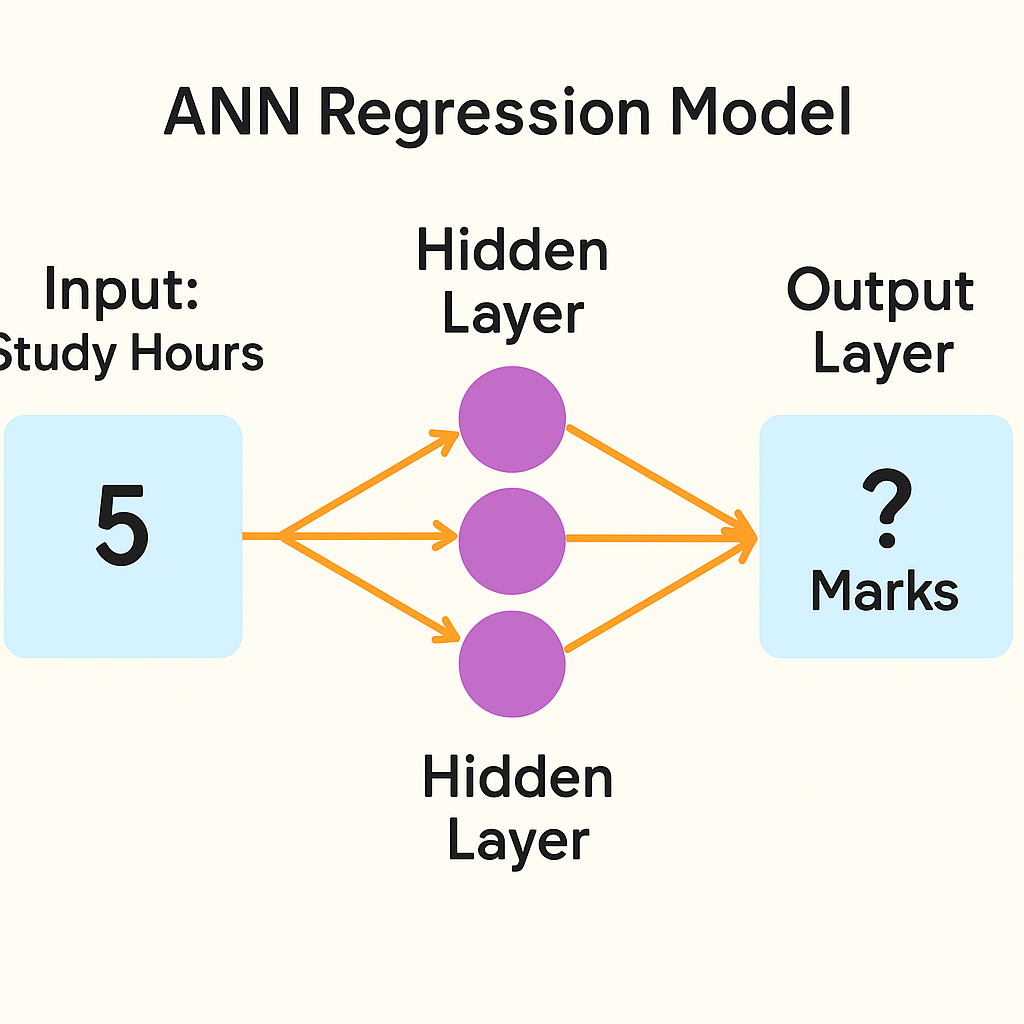

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Data
X = np.array([[2],[4],[6],[8],[10]])
y = np.array([[50],[65],[80],[85],[95]])

# Build model
model = Sequential([
    Dense(4, activation='relu', input_dim=1),
    Dense(1)
])

# Compile
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=200, verbose=0)

# Predict
model.predict(np.array([[5]]))

C:\Users\karan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


array([[-1.7448379]], dtype=float32)

# **Explanation**

###  What This Model Does
- **Input**: study hours
- **Predicts**: marks
- Learns relationship automatically
## Understanding the ANN Model Built Using Keras

In this code, we build a simple Artificial Neural Network (ANN) using Keras to predict **marks based on study hours**.

The idea:  
More study hours → higher marks  
The ANN will learn this pattern automatically.

---

### 1. Importing Libraries
We import the necessary modules:
- `Sequential` → to create the neural network
- `Dense` → to create layers
- `numpy` → for numerical data handling

---

### 2. Preparing the Data
We define the input (study hours) and output (marks):

X = [[2], [4], [6], [8], [10]]  
y = [[50], [65], [80], [85], [95]]

This means:
- 2 hours → 50 marks  
- 4 hours → 65 marks  
- … and so on

The model will learn the relationship between hours and marks.

---

### 3. Building the ANN Model
The model has **two layers**:

#### Layer 1 (Hidden Layer)
Dense(4, activation='relu', input_dim=1)

- 4 neurons  
- ReLU activation  
- Takes 1 input (study hours)

This layer learns patterns such as:
- More hours → more marks
- Non-linear relationships

#### Layer 2 (Output Layer)
Dense(1)

- 1 neuron  
- No activation (because we predict a number)

---

### 4. Compiling the Model
model.compile(optimizer='adam', loss='mse')

- **Optimizer (adam)**: Helps the model learn efficiently  
- **Loss (MSE)**: Mean Squared Error, perfect for regression problems

---

### 5. Training the Model
model.fit(X, y, epochs=200, verbose=0)

- Trains the model for **200 epochs**  
- Each epoch = model sees the entire dataset once  
- `verbose=0` hides training logs to keep output clean

The model adjusts weights during training to reduce the error between predictions and actual marks.

---

### 6. Making a Prediction
model.predict([[5]])

We ask the model:
**“If a student studies 5 hours, what marks will they score?”**

The model outputs a value close to actual expected marks (~75–85 range), based on the pattern it learned.

---

### Summary of This ANN
1. Input: Study hours  
2. Output: Predicted marks  
3. Model learns pattern: *more hours → higher marks*  
4. We used:
   - 4-neuron hidden layer  
   - ReLU activation  
   - Adam optimizer  
   - MSE loss  

This is your **first complete ANN regression model** using Keras.


# **Summary**


Today you learned:
- What ANN is
- How neurons work
- Activation functions
- Forward pass manually
- ANN using Keras


# **Task**


Build a simple Artificial Neural Network (ANN) using TensorFlow/Keras to learn the relationship between input X and output y.

## Given Dataset:
X = [1, 3, 5, 7, 9]
y = [10, 25, 40, 55, 70]

## Requirements:
1. Create an ANN model with:
   - 1 hidden layer with 6 neurons (ReLU activation)
   - 1 output neuron

2. Compile the model using:
   - Optimizer: adam
   - Loss: mse

3. Train the model for 250 epochs.

4. Use the trained model to predict the output for:
   X = 4


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

X =np.array([1, 3, 5, 7, 9] )
y = np.array([10, 25, 40, 55, 70])

model = Sequential([
    Dense(6, activation = 'relu', input_dim = 1),
    Dense(1)
])

model.compile(optimizer = 'adam', loss='mse')
model.fit(X, y, epochs = 250, verbose = 0)

model.predict(np.array([[4]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


array([[2.5365114]], dtype=float32)